## Fluid Flow and Vane Interaction

This section focuses on jet flows from a nozzle and interactions with a vane, which can be either flat (plate) or curved (hemispherical).

The nozzle, with diameter $d$, directs the fluid flow onto the vane. The flow rate $Q$ measures how much fluid passes through the nozzle in a given time. It is critical for determining the speed of the fluid when it hits the vane.

- We calculate the mean velocity $u$ using the equation:

$$
u = \frac{4Q}{\pi d^2}
$$

- As the fluid strikes the vane, its velocity changes, resulting in a deflected velocity $u_0$, calculated by:

$$
u_0 = \sqrt{u^2 - 2gs}
$$

where $g$ is the gravitational acceleration and $s$ is the distance from the nozzle to the vane. 

- The momentum $J$ of the fluid is found using:

$$
J = \dot{m} \cdot u_0
$$

where $\dot{m}$ is the mass flow rate. This equation indicates the combined effect of the mass of the fluid and its velocity on the force exerted on the vane.

- Finally, the force $F$ acting on the vane is described by:

$$
F = \frac{M \cdot g \cdot (a + y)}{a}
$$

This force is crucial for understanding how the vane will respond to the incoming fluid flow, as it depends on the mass of the vane $M$, gravitational acceleration $g$, the distance $a$ from the pivot point to the vane, and $y$, the height of the fluid column.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Constants
rho = 1000 * 1e-09  # kg/mm^3
g = 9.81 * 1000     # mm/s^2
diameter = 10       # mm  nozzle diameter
s = 35              # mm distance between nozzle-vane
Mass = 600/1000    # (kg) the jockey mass
a = 150             # mm vane-pivot distance

# Data for the flat plate
# Group 4
y1 = np.array([102, 86, 68, 42, 19])  # mm
vol1 = np.array([2000, 2000, 2000, 2000, 2000])  # mL
t1 = np.array([[3.45, 3.31, 3.25],
                [3.93, 3.71, 3.74],
                [4.37, 4.36, 4.33],
                [5.21, 5.25, 5.20],
                [6.88, 6.90, 6.78]])  # seconds

# Data for the hemispherical cup
y2 = np.array([188, 140, 90, 50, 20])  
vol2 = np.array([2000, 2000, 2000, 2000, 2000])
t2 = np.array([[3.53, 3.55, 3.66],
                [3.78, 3.98, 4.18],
                [4.98, 4.75, 4.93],
                [6.68, 6.25, 6.58],
                [9.49, 9.36, 9.54]])


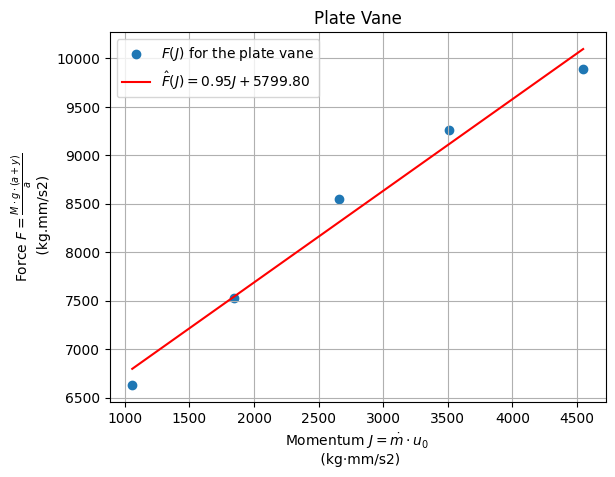


 - Results for Plate vane:
---------------------------------------------
  - The flow rates Q: [599401. 527241. 459418. 383142. 291829.] mm^3/s
  - The mass flow rates Qm: [0.599 0.527 0.459 0.383 0.292] kg/s
  - Mean Velocity u: [7632. 6713. 5849. 4878. 3716.] mm/s
  - Deflected Velocity u_0: [7587. 6662. 5790. 4807. 3622.] mm/s
  - Momentum J: [4547. 3512. 2660. 1842. 1057.] kg·mm/s^2
  - Force F: [9888. 9261. 8554. 7534. 6632.] kg.mm/s^2
  - Theoretical Force F: [10097.  9119.  8314.  7540.  6799.] kg.mm/s^2
---------------------------------------------
  - Linear Regression Slope (K): 0.95
  - Linear Regression Intercept: 5.8e+03
---------------------------------------------
  - Velocity Loss in percentage: [0.59 0.76 1.01 1.45 2.52]
---------------------------------------------




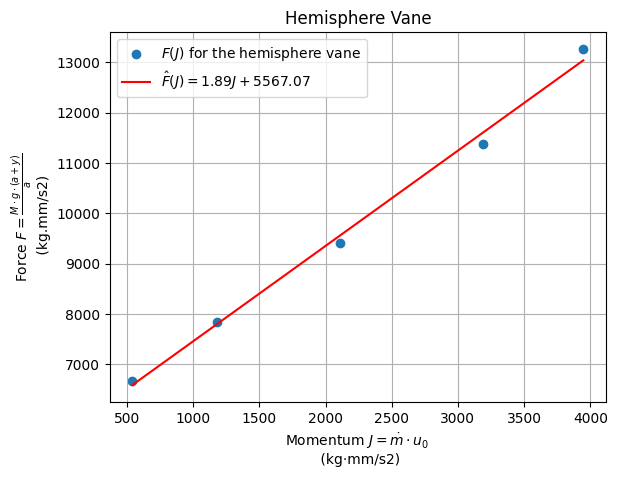


 - Results for Hemisphere vane:
---------------------------------------------
  - The flow rates Q: [558659. 502513. 409277. 307535. 211342.] mm^3/s
  - The mass flow rates Qm: [0.559 0.503 0.409 0.308 0.211] kg/s
  - Mean Velocity u: [7113. 6398. 5211. 3916. 2691.] mm/s
  - Deflected Velocity u_0: [7065. 6344. 5145. 3827. 2560.] mm/s
  - Momentum J: [3947. 3188. 2106. 1177.  541.] kg·mm/s^2
  - Force F: [13263. 11380.  9418.  7848.  6671.] kg.mm/s^2
  - Theoretical Force F: [13038. 11602.  9553.  7795.  6591.] kg.mm/s^2
---------------------------------------------
  - Linear Regression Slope (K): 1.9
  - Linear Regression Intercept: 5.6e+03
---------------------------------------------
  - Velocity Loss in percentage: [0.68 0.84 1.27 2.27 4.86]
---------------------------------------------




In [2]:
K_values = []
F_pred = []

# Computation
def solution(vol, time, y, plate="plate"):
    # Compute mean flow rates
    t_mean = np.mean(time, axis=1)  # Mean time for each measurement
    vol_mm3 = vol * 1e3              # Convert volume from mL to mm3
    q = vol_mm3 / t_mean               # mm^3/s

    # Mass flow rates
    m_dot = rho * q                   # kg/s

    # Velocity
    u = 4 * q / (np.pi * diameter**2)   # mm/s

    # Deflected velocity
    u_0 = [(i**2 - 2 * g * s)**0.5 for i in u]  # mm/s

    # velocity loss
    du = 100 * (u-u_0) / u

    # The delivery momentum
    J = m_dot * u_0

    # Force of the vane
    F = Mass * g * (a+y)/a

    # Fit a linear regression to F(J)
    model = LinearRegression()
    model.fit(J.reshape(-1, 1), F)  # Reshape J for sklearn
    K = model.coef_[0]  # Get the slope (K)
    intercept = model.intercept_  # Get the intercept

    K_values.append(K)  # Store the slope
    F_pred.append(model.predict(J.reshape(-1, 1)))  # Store predictions

    F_th = K * J + intercept
    
    # Let us plot F(J):
    plt.scatter(J, F, label=f"$F(J)$ for the {plate} vane")
    plt.plot(J, F_pred[-1], label=f"$\\hat{{F}}(J)={K:.2f}J+{intercept:.2f}$", color='red')
    plt.xlabel("Momentum $J=\\dot{m}\\cdot u_0$ \n (kg·mm/s2)")
    plt.ylabel("Force $F=\\frac{M\\cdot g \\cdot (a+y)}{a}$\n (kg.mm/s2)")
    plt.legend()
    plt.grid(True)
    plt.title(f"{plate.capitalize()} Vane")
    plt.show()

    # Print results with rounding
    print(f"\n - Results for {plate.capitalize()} vane:")
    print("---------------------------------------------")
    print(f"  - The flow rates Q: {np.round(q)} mm^3/s")
    print(f"  - The mass flow rates Qm: {np.round(m_dot,3)} kg/s")
    print(f"  - Mean Velocity u: {np.round(u)} mm/s")
    print(f"  - Deflected Velocity u_0: {np.round(u_0)} mm/s")
    print(f"  - Momentum J: {np.round(J)} kg·mm/s^2")
    print(f"  - Force F: {np.round(F)} kg.mm/s^2")
    print(f"  - Theoretical Force F: {np.round(F_th)} kg.mm/s^2")
    print("---------------------------------------------")
    print(f"  - Linear Regression Slope (K): {K:.2g}")
    print(f"  - Linear Regression Intercept: {intercept:.2g}")
    print("---------------------------------------------")
    print(f"  - Velocity Loss in percentage: {np.round(du,2)}")
    print("---------------------------------------------")
    print("\n")

# Execute the function for both configurations
solution(vol1, t1, y1, plate="plate")
solution(vol2, t2, y2, plate="hemisphere")

In [28]:
def solution_us_customary(vol, time, y, plate="plate"):
    # Compute mean flow rates
    t_mean = np.mean(time, axis=1)  # Mean time for each measurement
    vol_mm3 = vol * 1e3              # Convert volume from mL to mm3
    q = vol_mm3 / t_mean               # mm^3/s
    q_cfs = q * 3.53147e-8             # Convert mm^3/s to cfs

    # Mass flow rates in g/s
    m_dot_g = rho * q                 # g/s
    m_dot_lb = m_dot_g * 0.00220462   # Convert to lb/s

    # Velocity in mm/s and ft/s
    u_mm_s = 4 * q / (np.pi * diameter**2)  # mm/s
    u_ft_s = u_mm_s * 0.00328084            # ft/s

    # Deflected velocity in mm/s and ft/s
    u_0_mm_s = [(i**2 - 2 * g * s)**0.5 for i in u_mm_s]  # mm/s
    u_0_ft_s = [vel * 0.00328084 for vel in u_0_mm_s]      # ft/s

    # Velocity loss
    du = 100 * (u_mm_s - u_0_mm_s) / u_mm_s

    # Delivery momentum in kg·mm/s and lb·ft/s
    J_kg_mm_s = m_dot_g * u_0_mm_s
    J_lb_ft_s = [momentum * 0.00723301 for momentum in J_kg_mm_s]  # Convert to lb·ft/s

    # Force of the vane in kg·mm/s² and lb·ft/s²
    F_kg_mm_s2 = Mass * g * (a + y) / a
    F_lb_ft_s2 = F_kg_mm_s2 * 0.00723301  # Convert to lb·ft/s²

    # Fit a linear regression to F_th vs F
    model = LinearRegression()
    model.fit(F_lb_ft_s2.reshape(-1, 1), J_lb_ft_s)  # Fit F_th vs. F
    K = model.coef_[0]  # Get the slope (K)
    intercept = model.intercept_  # Get the intercept

    K_values.append(K)  # Store the slope
    F_pred.append(model.predict(F_lb_ft_s2.reshape(-1, 1)))  # Store predictions

    # Plotting F vs F_th in U.S. customary units
    plt.scatter(F_lb_ft_s2, J_lb_ft_s, label=f"$F(J)$ for the {plate} vane")
    plt.plot(F_lb_ft_s2, F_pred[-1], label=f"$\\hat{{F}}(J)={K:.2f}J+{intercept:.2f}$", color='red')
    plt.xlabel("Momentum $J=\\dot{m}\\cdot u_0$ \n (lb·ft/s)")
    plt.ylabel("Force $F=\\frac{M\\cdot g \\cdot (a+y)}{a}$\n (lb·ft/s²)")
    plt.legend()
    plt.grid(True)
    plt.title(f"{plate.capitalize()} Vane in U.S. Customary Units")
    plt.show()

    # Print results with rounding
    print(f"\n - Results for {plate.capitalize()} vane in U.S. Customary Units:")
    print("---------------------------------------------")
    print(f"  - The flow rates Q: {np.round(q_cfs, 4)} cfs")
    print(f"  - The mass flow rates Qm: {np.round(m_dot_lb, 5)} lb/s")
    print(f"  - Mean Velocity u: {np.round(u_ft_s, 3)} ft/s")
    print(f"  - Deflected Velocity u_0: {np.round(u_0_ft_s, 3)} ft/s")
    print(f"  - Momentum J: {np.round(J_lb_ft_s, 3)} lb·ft/s")
    print(f"  - Force F: {np.round(F_lb_ft_s2, 3)} lb·ft/s²")
    print(f"  - Theoretical Force F: {np.round(F_pred[-1], 3)} lb·ft/s²")
    print("---------------------------------------------")
    print(f"  - Linear Regression Slope (K): {K:.2g}")
    print(f"  - Linear Regression Intercept: {intercept:.2g}")
    print("---------------------------------------------")
    print(f"  - Velocity Loss in percentage: {np.round(du, 2)}")
    print("---------------------------------------------")
    print("\n")


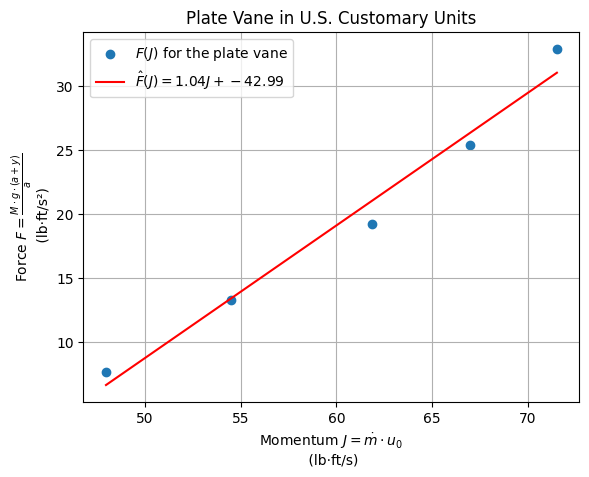


 - Results for Plate vane in U.S. Customary Units:
---------------------------------------------
  - The flow rates Q: [0.0212 0.0186 0.0162 0.0135 0.0103] cfs
  - The mass flow rates Qm: [0.00132 0.00116 0.00101 0.00084 0.00064] lb/s
  - Mean Velocity u: [25.039 22.024 19.191 16.005 12.191] ft/s
  - Deflected Velocity u_0: [24.891 21.856 18.998 15.772 11.884] ft/s
  - Momentum J: [32.892 25.405 19.242 13.323  7.646] lb·ft/s
  - Force F: [71.523 66.982 61.873 54.494 47.966] lb·ft/s²
  - Theoretical Force F: [31.042 26.341 21.053 13.414  6.657] lb·ft/s²
---------------------------------------------
  - Linear Regression Slope (K): 1
  - Linear Regression Intercept: -43
---------------------------------------------
  - Velocity Loss in percentage: [0.59 0.76 1.01 1.45 2.52]
---------------------------------------------




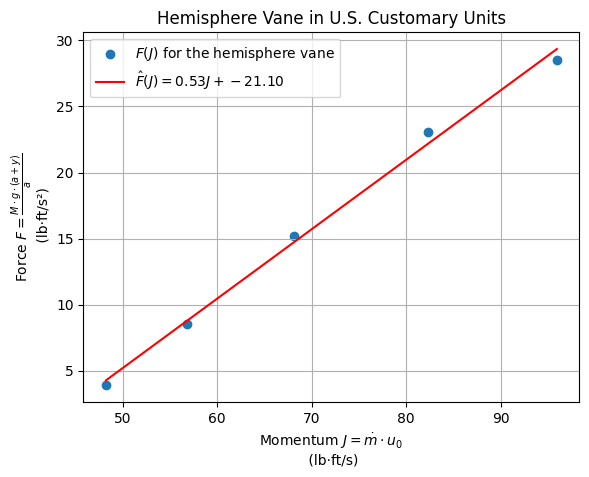


 - Results for Hemisphere vane in U.S. Customary Units:
---------------------------------------------
  - The flow rates Q: [0.0197 0.0177 0.0145 0.0109 0.0075] cfs
  - The mass flow rates Qm: [0.00123 0.00111 0.0009  0.00068 0.00047] lb/s
  - Mean Velocity u: [23.337 20.991 17.097 12.847  8.828] ft/s
  - Deflected Velocity u_0: [23.178 20.815 16.879 12.556  8.399] ft/s
  - Momentum J: [28.547 23.059 15.23   8.513  3.913] lb·ft/s
  - Force F: [95.932 82.309 68.118 56.765 48.25 ] lb·ft/s²
  - Theoretical Force F: [29.345 22.181 14.718  8.748  4.27 ] lb·ft/s²
---------------------------------------------
  - Linear Regression Slope (K): 0.53
  - Linear Regression Intercept: -21
---------------------------------------------
  - Velocity Loss in percentage: [0.68 0.84 1.27 2.27 4.86]
---------------------------------------------




In [30]:
# Execute the function for both configurations in US customary units
solution_us_customary(vol1, t1, y1, plate="plate")
solution_us_customary(vol2, t2, y2, plate="hemisphere")